## Vanishing Gradident Problem

In [96]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [97]:
x,y = make_moons(n_samples=205,noise=0.05,random_state=42)

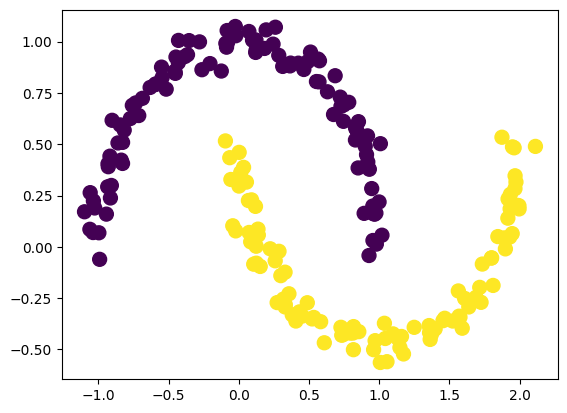

In [98]:
plt.scatter(x[:,0],x[:,1],c=y,s=100)
plt.show()

In [99]:
model = Sequential()

model.add(Dense(10,activation='sigmoid',input_dim=2))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

In [100]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [101]:
old_wts = model.get_weights()[0]

In [102]:
old_wts           ### layer of 1st layer

array([[ 0.32517284, -0.2571288 ,  0.63917714, -0.6338829 ,  0.08675021,
         0.4128273 ,  0.43207628, -0.09365368,  0.0125466 , -0.07790965],
       [-0.17681497, -0.27984276, -0.42013597, -0.17750347, -0.1308626 ,
         0.09620625,  0.37413937, -0.62155795,  0.41110796,  0.68244344]],
      dtype=float32)

In [103]:
x_train  ,x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [104]:
model.fit(x_train , y_train , epochs=100)

Epoch 1/100
6/6 [==============================] - 2s 5ms/step - loss: 0.8018 - accuracy: 0.5427
Epoch 2/100
6/6 [==============================] - 0s 6ms/step - loss: 0.7866 - accuracy: 0.5427
Epoch 3/100
6/6 [==============================] - 0s 6ms/step - loss: 0.7722 - accuracy: 0.5427
Epoch 4/100
6/6 [==============================] - 0s 7ms/step - loss: 0.7607 - accuracy: 0.5427
Epoch 5/100
6/6 [==============================] - 0s 6ms/step - loss: 0.7492 - accuracy: 0.5427
Epoch 6/100
6/6 [==============================] - 0s 6ms/step - loss: 0.7408 - accuracy: 0.5427
Epoch 7/100
6/6 [==============================] - 0s 7ms/step - loss: 0.7322 - accuracy: 0.5427
Epoch 8/100
6/6 [==============================] - 0s 6ms/step - loss: 0.7245 - accuracy: 0.5427
Epoch 9/100
6/6 [==============================] - 0s 6ms/step - loss: 0.7181 - accuracy: 0.5427
Epoch 10/100
6/6 [==============================] - 0s 8ms/step - loss: 0.7127 - accuracy: 0.5427
Epoch 11/100
6/6 [===========

6/6 [==============================] - 0s 8ms/step - loss: 0.6896 - accuracy: 0.5427
Epoch 85/100
6/6 [==============================] - 0s 6ms/step - loss: 0.6897 - accuracy: 0.5427
Epoch 86/100
6/6 [==============================] - 0s 5ms/step - loss: 0.6897 - accuracy: 0.5427
Epoch 87/100
6/6 [==============================] - 0s 5ms/step - loss: 0.6898 - accuracy: 0.5427
Epoch 88/100
6/6 [==============================] - 0s 5ms/step - loss: 0.6897 - accuracy: 0.5427
Epoch 89/100
6/6 [==============================] - 0s 5ms/step - loss: 0.6897 - accuracy: 0.5427
Epoch 90/100
6/6 [==============================] - 0s 7ms/step - loss: 0.6900 - accuracy: 0.5427
Epoch 91/100
6/6 [==============================] - 0s 6ms/step - loss: 0.6897 - accuracy: 0.5427
Epoch 92/100
6/6 [==============================] - 0s 5ms/step - loss: 0.6897 - accuracy: 0.5427
Epoch 93/100
6/6 [==============================] - 0s 5ms/step - loss: 0.6895 - accuracy: 0.5427
Epoch 94/100
6/6 [===============

In [105]:
new_wts = model.get_weights()[0]

In [106]:
new_wts[0]

array([ 0.32818034, -0.2587778 ,  0.6351253 , -0.62845135,  0.09270434,
        0.42212993,  0.43422207, -0.08285179,  0.01786328, -0.08419011],
      dtype=float32)

In [107]:
model.optimizer.get_config()['learning_rate']

0.001

In [108]:
gradient = (old_wts - new_wts)/0.001
percent_change = abs(100*(old_wts-new_wts)/old_wts)

In [109]:
gradient

array([[ -3.0075011,   1.6489922,   4.051864 ,  -5.4315324,  -5.954131 ,
         -9.302616 ,  -2.145797 , -10.801888 ,  -5.316682 ,   6.280459 ],
       [  1.9898115,  -0.7553398,  -4.0133595,   4.640609 ,   4.1369047,
          6.846532 ,   1.8197893,   6.5653915,   3.9663908,  -4.011929 ]],
      dtype=float32)

In [110]:
percent_change

array([[ 0.92489314,  0.64130986,  0.6339188 ,  0.85686696,  6.8635354 ,
         2.2533917 ,  0.4966246 , 11.533865  , 42.375484  ,  8.061209  ],
       [ 1.1253638 ,  0.26991582,  0.9552525 ,  2.6143765 ,  3.1612587 ,
         7.116515  ,  0.48639345,  1.0562799 ,  0.96480525,  0.58787715]],
      dtype=float32)

In [111]:
old_wts

array([[ 0.32517284, -0.2571288 ,  0.63917714, -0.6338829 ,  0.08675021,
         0.4128273 ,  0.43207628, -0.09365368,  0.0125466 , -0.07790965],
       [-0.17681497, -0.27984276, -0.42013597, -0.17750347, -0.1308626 ,
         0.09620625,  0.37413937, -0.62155795,  0.41110796,  0.68244344]],
      dtype=float32)

In [112]:
new_wts           ### almost no change in old and new wts this is vanishing gradient problem

array([[ 0.32818034, -0.2587778 ,  0.6351253 , -0.62845135,  0.09270434,
         0.42212993,  0.43422207, -0.08285179,  0.01786328, -0.08419011],
       [-0.17880479, -0.27908742, -0.41612262, -0.18214408, -0.1349995 ,
         0.08935972,  0.37231958, -0.62812334,  0.40714157,  0.68645537]],
      dtype=float32)

## How to Prevent VGP

### 1 ) reduce complexity

In [113]:
model = Sequential()

model.add(Dense(10,activation='sigmoid',input_dim=2))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

In [114]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [115]:
old_wts = model.get_weights()[0]

In [116]:
model.fit(x_train , y_train , epochs=100)                ### loss is reducing

Epoch 1/100
6/6 [==============================] - 1s 4ms/step - loss: 0.7322 - accuracy: 0.4573
Epoch 2/100
6/6 [==============================] - 0s 6ms/step - loss: 0.7214 - accuracy: 0.4573
Epoch 3/100
6/6 [==============================] - 0s 5ms/step - loss: 0.7121 - accuracy: 0.4573
Epoch 4/100
6/6 [==============================] - 0s 7ms/step - loss: 0.7053 - accuracy: 0.4573
Epoch 5/100
6/6 [==============================] - 0s 7ms/step - loss: 0.6985 - accuracy: 0.4573
Epoch 6/100
6/6 [==============================] - 0s 7ms/step - loss: 0.6948 - accuracy: 0.4573
Epoch 7/100
6/6 [==============================] - 0s 6ms/step - loss: 0.6910 - accuracy: 0.4573
Epoch 8/100
6/6 [==============================] - 0s 5ms/step - loss: 0.6892 - accuracy: 0.6098
Epoch 9/100
6/6 [==============================] - 0s 9ms/step - loss: 0.6875 - accuracy: 0.6585
Epoch 10/100
6/6 [==============================] - 0s 6ms/step - loss: 0.6863 - accuracy: 0.5427
Epoch 11/100
6/6 [===========

6/6 [==============================] - 0s 4ms/step - loss: 0.5358 - accuracy: 0.7866
Epoch 85/100
6/6 [==============================] - 0s 6ms/step - loss: 0.5312 - accuracy: 0.7927
Epoch 86/100
6/6 [==============================] - 0s 5ms/step - loss: 0.5272 - accuracy: 0.7866
Epoch 87/100
6/6 [==============================] - 0s 5ms/step - loss: 0.5234 - accuracy: 0.7866
Epoch 88/100
6/6 [==============================] - 0s 4ms/step - loss: 0.5195 - accuracy: 0.7866
Epoch 89/100
6/6 [==============================] - 0s 4ms/step - loss: 0.5155 - accuracy: 0.7927
Epoch 90/100
6/6 [==============================] - 0s 4ms/step - loss: 0.5117 - accuracy: 0.7866
Epoch 91/100
6/6 [==============================] - 0s 4ms/step - loss: 0.5077 - accuracy: 0.7927
Epoch 92/100
6/6 [==============================] - 0s 5ms/step - loss: 0.5032 - accuracy: 0.7927
Epoch 93/100
6/6 [==============================] - 0s 5ms/step - loss: 0.4988 - accuracy: 0.7988
Epoch 94/100
6/6 [===============

In [117]:
new_wts = model.get_weights()[0]

In [118]:
old_wts

array([[-0.03513902,  0.32423896,  0.5507615 ,  0.6874947 ,  0.3575074 ,
         0.6080801 , -0.6486998 ,  0.26700044,  0.09635711,  0.60868245],
       [ 0.3309042 ,  0.4604606 ,  0.69942874,  0.38877183,  0.58518475,
         0.6143474 ,  0.11091417,  0.30919737,  0.13763797, -0.19988179]],
      dtype=float32)

In [119]:
new_wts

array([[-0.6686609 , -0.3027729 ,  1.1276042 ,  1.307121  , -0.40942758,
         1.257154  , -1.2078438 ,  0.8109879 ,  0.8399402 ,  1.1880343 ],
       [ 1.1841832 ,  1.239347  , -0.11114496, -0.5229912 ,  1.5582213 ,
        -0.2833441 ,  0.9841932 , -0.42791817, -0.83245975, -1.07557   ]],
      dtype=float32)

### 2) Use Relu as activation

In [130]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [131]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [132]:
old_wts = model.get_weights()[0]

In [133]:
model.fit(x_train,y_train,epochs=100)

Epoch 1/100
6/6 [==============================] - 4s 7ms/step - loss: 0.6932 - accuracy: 0.5427
Epoch 2/100
6/6 [==============================] - 0s 6ms/step - loss: 0.6929 - accuracy: 0.5427
Epoch 3/100
6/6 [==============================] - 0s 7ms/step - loss: 0.6928 - accuracy: 0.5427
Epoch 4/100
6/6 [==============================] - 0s 6ms/step - loss: 0.6926 - accuracy: 0.5427
Epoch 5/100
6/6 [==============================] - 0s 7ms/step - loss: 0.6925 - accuracy: 0.5427
Epoch 6/100
6/6 [==============================] - 0s 8ms/step - loss: 0.6923 - accuracy: 0.5427
Epoch 7/100
6/6 [==============================] - 0s 7ms/step - loss: 0.6920 - accuracy: 0.5427
Epoch 8/100
6/6 [==============================] - 0s 7ms/step - loss: 0.6916 - accuracy: 0.5427
Epoch 9/100
6/6 [==============================] - 0s 6ms/step - loss: 0.6911 - accuracy: 0.5427
Epoch 10/100
6/6 [==============================] - 0s 7ms/step - loss: 0.6902 - accuracy: 0.5427
Epoch 11/100
6/6 [===========

6/6 [==============================] - 0s 5ms/step - loss: 0.0035 - accuracy: 1.0000
Epoch 85/100
6/6 [==============================] - 0s 6ms/step - loss: 0.0032 - accuracy: 1.0000
Epoch 86/100
6/6 [==============================] - 0s 6ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 87/100
6/6 [==============================] - 0s 7ms/step - loss: 0.0028 - accuracy: 1.0000
Epoch 88/100
6/6 [==============================] - 0s 9ms/step - loss: 0.0025 - accuracy: 1.0000
Epoch 89/100
6/6 [==============================] - 0s 8ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 90/100
6/6 [==============================] - 0s 8ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 91/100
6/6 [==============================] - 0s 7ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 92/100
6/6 [==============================] - 0s 7ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch 93/100
6/6 [==============================] - 0s 6ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 94/100
6/6 [===============

In [134]:
new_wts = model.get_weights()[0]

In [135]:
old_wts

array([[-0.5474223 ,  0.08234417, -0.14051068,  0.3388893 , -0.6470573 ,
         0.50005025,  0.38665456,  0.2023381 ,  0.17239106, -0.6150624 ],
       [ 0.268278  , -0.21422249, -0.6068536 , -0.164235  ,  0.6514341 ,
        -0.6514235 , -0.33356297, -0.13635957,  0.09804672,  0.59966177]],
      dtype=float32)

In [136]:
new_wts

array([[-0.908107  ,  0.15759988, -0.06318096,  0.34622407, -0.5992977 ,
         0.48158833,  0.38034293,  0.35401922,  0.29799926, -0.5983582 ],
       [ 0.28812608, -0.204281  , -0.68294615, -0.12445637,  0.92078257,
        -0.70979834, -0.37912717,  0.02781517,  0.28645727,  0.7598189 ]],
      dtype=float32)

In [137]:
gradient = (old_wts - new_wts)/0.001
percent_change = abs(100*(old_wts-new_wts)/old_wts)

In [138]:
percent_change               ### vgd is gonne

array([[ 65.88783  ,  91.39166  ,  55.034763 ,   2.1643553,   7.381045 ,
          3.6920116,   1.632368 ,  74.964195 ,  72.862366 ,   2.7158546],
       [  7.398325 ,   4.6407304,  12.538862 ,  24.220556 ,  41.346996 ,
          8.961117 ,  13.65985  , 120.3984   , 192.16405  ,  26.707914 ]],
      dtype=float32)